### Multiclass Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [2]:
flight_data = pd.read_csv("/teamspace/studios/this_studio/Flight_delay_analysis/data/preprocessed_flight_data_for_binary_classification.csv")
flight_data.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,target
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,9,1,2,2019,False
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,4.904470,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,19,11,5,2022,False
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,7,4,2022,True
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,-0.138889,-0.051551,1.456688,-0.017174,-0.178016,6,3,0,2023,True
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,23,2,6,2020,False
5,0.945543,0.945543,1.060067,-1.546032,-1.056819,-0.901218,-0.896582,0.706648,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.201514,-0.257211,-0.748491,-0.743940,-0.257045,2.715568,False,False,-1.149801,-1.160713,-1.101160,-1.068835,4.305829,-0.051551,-0.157574,-0.017174,-0.178016,31,7,2,2019,True
6,-1.272579,-1.272579,-1.401658,-0.454018,-0.216073,-0.871791,1.689947,-1.331680,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,-0.656730,-0.647777,0.059075,-0.648152,-0.634921,-0.652990,False,False,-0.465027,-0.666543,-0.781983,-0.698020,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,11,6,6,2023,False
7,0.604293,0.604293,1.411742,1.260868,1.117445,-0.175360,-0.202403,-0.871096,1.688872,0.650240,0.613802,-0.324895,0.595269,0.611088,0.878466,5.389010,0.888362,1.015701,0.377392,False,False,-0.283353,0.208845,-0.346742,-0.334009,-0.138889,-0.051551,1.389428,-0.017174,-0.178016,8,7,0,2019,True
8,1.116167,1.116167,0.180879,1.165449,-1.099744,-0.106698,-0.211912,0.157868,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,-1.627060,-1.527501,0.059075,-1.512197,-1.432032,-0.296319,False,False,1.184019,1.168947,1.278159,0.968948,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,12,2,6,2023,False
9,-1.613828,-1.613828,-1.225820,-0.122703,-1.309787,1.354827,1.347612,-0.586906,-0.629199,1.642257,1.573070,-0.386560,0.265232,1.561452,1.686143,-0.748491,1.689852,1.669934,-0.058539,False,False,0.946444,1.183066,1.249143,1.230900,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,8,5,2020,True


In [3]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476398 entries, 0 to 3476397
Data columns (total 35 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   airline                  float64
 1   airline_dot              float64
 2   airline_code             float64
 3   dot_code                 float64
 4   fl_number                float64
 5   origin                   float64
 6   origin_city              float64
 7   dest                     float64
 8   dest_city                float64
 9   crs_dep_time             float64
 10  dep_time                 float64
 11  dep_delay                float64
 12  taxi_out                 float64
 13  wheels_off               float64
 14  wheels_on                float64
 15  taxi_in                  float64
 16  crs_arr_time             float64
 17  arr_time                 float64
 18  arr_delay                float64
 19  cancelled                bool   
 20  diverted                 bool   
 21  crs_elap

In [4]:
flight_data.isna().sum()

airline                    0
airline_dot                0
airline_code               0
dot_code                   0
fl_number                  0
origin                     0
origin_city                0
dest                       0
dest_city                  0
crs_dep_time               0
dep_time                   0
dep_delay                  0
taxi_out                   0
wheels_off                 0
wheels_on                  0
taxi_in                    0
crs_arr_time               0
arr_time                   0
arr_delay                  0
cancelled                  0
diverted                   0
crs_elapsed_time           0
elapsed_time               0
air_time                   0
distance                   0
delay_due_carrier          0
delay_due_weather          0
delay_due_nas              0
delay_due_security         0
delay_due_late_aircraft    0
day                        0
month                      0
day_of_week                0
year                       0
target        

In [5]:
# Drop or keep the original target column based on necessity
flight_data = flight_data.drop(columns=['target'])

In [6]:
flight_data.columns

Index(['airline', 'airline_dot', 'airline_code', 'dot_code', 'fl_number',
       'origin', 'origin_city', 'dest', 'dest_city', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance',
       'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft', 'day', 'month',
       'day_of_week', 'year'],
      dtype='object')

In [7]:
# Define conditions for each delay type
conditions = [
    (flight_data['delay_due_carrier'] > 0),
    (flight_data['delay_due_weather'] > 0),
    (flight_data['delay_due_nas'] > 0),
    (flight_data['delay_due_security'] > 0),
    (flight_data['delay_due_late_aircraft'] > 0),
]

# Assign class labels for each condition
classes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Create the new target column
flight_data['delay_category'] = np.select(conditions, classes, default='no_delay')

In [8]:
flight_data.sample(20)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,delay_category
2802706,-1.101954,-1.101954,-0.874146,-0.493776,-0.052960,1.354827,1.347612,0.736047,0.729343,1.240923,1.188562,-0.324895,0.375244,1.180109,1.295576,-0.910004,1.396624,1.280778,-0.395395,False,False,0.177821,0.124130,0.161039,0.249430,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,25,1,2,2023,no_delay
2016301,0.774918,0.774918,0.532554,0.868591,1.995392,1.188076,1.033806,1.373025,1.204357,-1.440816,-1.408871,-0.201565,0.925306,-1.399452,-1.360657,-0.425465,-1.467236,-1.347433,0.139612,False,False,-0.968126,-0.737139,-0.840016,-1.050124,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,20,10,2,2021,no_delay
1451625,-1.272579,-1.272579,-1.401658,-0.454018,-1.309787,1.600050,-1.048731,-1.057289,-1.094713,0.255080,0.233299,-0.283785,-0.174818,0.297627,0.516339,-0.263951,0.604908,0.515626,-0.435025,False,False,1.491468,1.394853,1.481271,1.280228,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,28,2,6,2021,no_delay
2978119,-1.272579,-1.272579,-1.401658,-0.454018,-0.798128,-0.548098,-0.031236,-0.831897,-0.885707,-0.016593,0.185236,1.113959,-0.394843,0.165854,0.694559,0.705128,0.501301,0.703624,1.011474,False,False,0.918495,0.886564,0.900950,0.987659,-0.138889,-0.051551,-0.157574,-0.017174,1.982028,12,6,6,2022,late_aircraft_delay
2807158,-1.101954,-1.101954,-0.874146,-0.493776,-0.271016,0.491645,0.406192,-1.586470,-1.493725,-1.496386,-1.547054,-0.242675,-0.174818,-1.477318,-1.167269,1.997233,-1.154459,-1.052277,0.080167,False,False,-0.311303,-0.087658,-0.245186,-0.238753,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,4,8,4,2023,no_delay
1127494,-1.101954,-1.101954,-0.874146,-0.493776,-0.856505,0.609352,0.415701,1.471021,1.166356,-0.446741,-0.443596,-0.222120,-0.284830,-0.459070,-0.406991,-0.910004,-0.372518,-0.407444,-0.256689,False,False,0.387446,0.364155,0.494724,0.308965,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,18,10,0,2021,no_delay
3349379,-1.272579,-1.272579,-1.401658,-0.454018,-0.452589,-0.832556,-0.887072,1.525727,1.258148,-0.861394,-0.842636,-0.176596,-0.347601,-0.858037,-0.794794,-0.263951,-0.851126,-0.784459,-0.171717,False,False,0.201577,0.205645,0.282094,0.241284,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,6,7,1,2021,no_delay
3144245,0.578541,0.578541,0.431366,1.010442,1.054417,-1.178923,-1.181055,1.466212,1.319526,0.397616,0.374052,-0.262649,-0.171710,0.358146,0.321377,-0.312705,0.284884,0.321740,-0.027321,False,False,-0.569710,-0.411600,-0.370969,-0.553149,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,7,4,6,2019,no_delay
1031357,-1.272579,-1.272579,-1.401658,-0.454018,0.213743,0.707441,0.710489,-0.831897,-0.885707,1.010413,1.016334,0.209536,-0.394843,0.994428,0.870883,0.220588,0.855129,0.872822,0.000906,False,False,-1.010051,-1.160713,-1.159192,-1.079041,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,20,7,5,2019,no_delay
2777075,-1.101954,-1.101954,-0.874146,-0.493776,-0.075281,0.373938,0.739017,-1.331680,-1.284719,-1.290573,-1.352797,-0.304340,-0.724880,-1.293634,-1.015593,-0.263951,-1.041078,-1.003397,-0.553915,False,False,0.499246,0.321798,0.451200,0.530093,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,24,10,3,2019,no_delay


In [9]:
flight_data.delay_category.value_counts()

delay_category
no_delay               2728958
carrier_delay           368739
nas_delay               199553
late_aircraft_delay     134507
weather_delay            42448
security_delay            2193
Name: count, dtype: int64

/tmp/ipykernel_8642/2276662804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flight_data, x='delay_category',palette='magma')


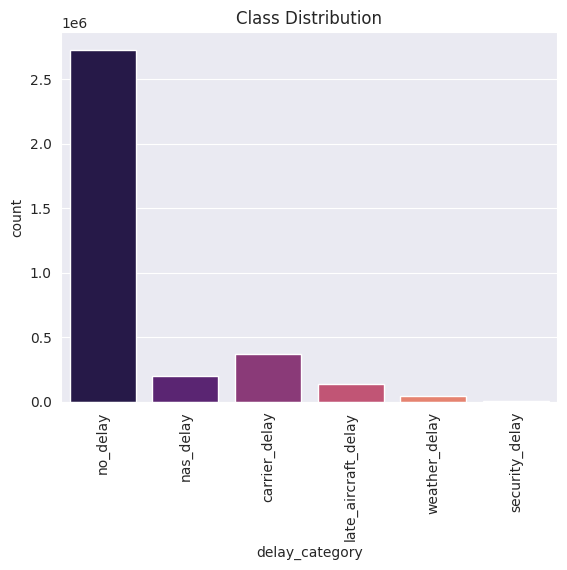

In [10]:
# Visualize the distribution

sns.countplot(data=flight_data, x='delay_category',palette='magma')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


### Data Preparation

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [12]:
# handle class imbalance 
from imblearn.over_sampling import SMOTE

def balance_with_smote(df: pd.DataFrame, target_column: str):
    """
    Apply SMOTE to balance the dataset.

    Parameters:
        df (pd.DataFrame): Input DataFrame (encoded and scaled).
        target_column (str): Name of the target column.

    Returns:
        X_resampled (pd.DataFrame): Resampled feature set.
        y_resampled (pd.Series): Resampled target column.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    smote = SMOTE(random_state=142)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Convert back to DataFrame
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled = pd.Series(y_resampled, name=target_column)

    return X_resampled, y_resampled

In [13]:
# Assuming `flight_data` is your DataFrame
features_to_drop = [
    'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
    'delay_due_security', 'delay_due_late_aircraft', 'delay_category'
]

# Prepare features and target
X = flight_data.drop(columns=features_to_drop)
y = flight_data['delay_category']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Combine train set for balancing
train_data = pd.concat([X_train, y_train], axis=1)

In [14]:
# encode the delay category into numeric


In [26]:
# Balancing the target class 
X_balanced, y_balanced = balance_with_smote(flight_data, target_column='delay_category')

In [ ]:
# Check class distribution
print("Class distribution after SMOTE:")
print(y_balanced.value_counts())

### Model Building and Evaluation

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#### 1. Baseline Logistic regression

In [17]:
# Train a logistic regression model

log_reg = LogisticRegression(
    multi_class='multinomial', 
    solver='lbfgs', 
    class_weight='balanced', 
    max_iter=500
)
    
log_reg.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_log_reg = log_reg.predict(X_test)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Model Evaluation for Logistic Regression
print("Logistic Regression:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])}")

In [18]:
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Classification Report:
                     precision    recall  f1-score   support

      carrier_delay       0.57      0.15      0.24     73748
late_aircraft_delay       0.29      0.41      0.34     26901
          nas_delay       0.33      0.54      0.41     39911
           no_delay       0.98      0.93      0.95    545792
     security_delay       0.01      0.42      0.01       438
      weather_delay       0.12      0.32      0.17      8490

           accuracy                           0.79    695280
          macro avg       0.38      0.46      0.36    695280
       weighted avg       0.86      0.79      0.81    695280

Confusion Matrix:
[[ 11393  17022  11943   4188  18072  11130]
 [  2735  11120   1263   1432   6654   3697]
 [  3183   2611  21603   4637   2697   5180]
 [  1685   5988  27937 505120   4096    966]
 [    68    112     25     15    186     32]
 [  1017   1372   1807    321   1235   2738]]


#### 2. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf.predict(X_test)

In [25]:
# Model Evaluation for Random Forest
print("\nRandom Forest:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
# print(f"Precision: {precision_score(y_test, y_pred_rf)}")
# print(f"Recall: {recall_score(y_test, y_pred_rf)}")
# print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
# print(f"ROC-AUC Score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])}")


Random Forest:
Accuracy: 0.9277442181567138


In [21]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_rf))
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[ 66141   2737   2202   2578      3     87]
 [ 16811   8380    264   1422      1     23]
 [ 12812    683  24306   2035      2     73]
 [   367     51     57 545317      0      0]
 [   379     35      5      3     16      0]
 [  6133    417    812    246      0    882]]
Classification report:
                      precision    recall  f1-score   support

      carrier_delay       0.64      0.90      0.75     73748
late_aircraft_delay       0.68      0.31      0.43     26901
          nas_delay       0.88      0.61      0.72     39911
           no_delay       0.99      1.00      0.99    545792
     security_delay       0.73      0.04      0.07       438
      weather_delay       0.83      0.10      0.18      8490

           accuracy                           0.93    695280
          macro avg       0.79      0.49      0.52    695280
       weighted avg       0.93      0.93      0.92    695280



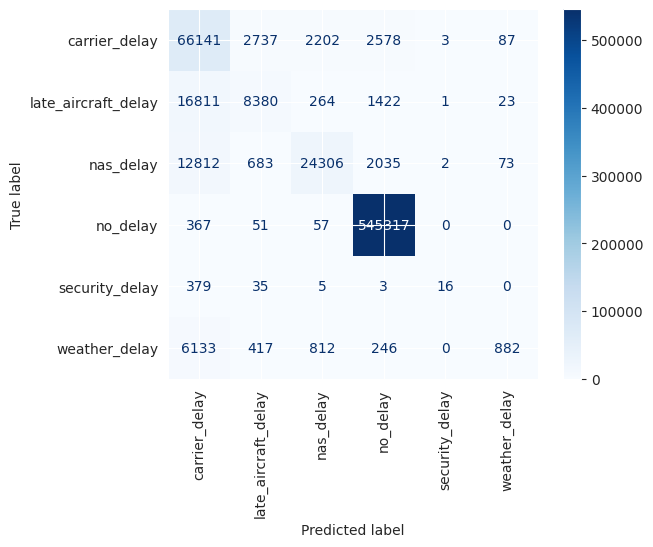

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.show()

#### 3. Gradient Boost Classifier

In [ ]:
# xg boost 
xgb = XGBClassifier(random_state=142)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])}")

In [ ]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_xgb))
print("Classification report:\n", classification_report(y_test, y_pred_xgb))

#### 3. Neural Network Model

In [ ]:
# use Pytorch instead come back to this

In [ ]:
# Define the neural network
model = Sequential([
    Dense(64, activation='relu', input_dim=X_resampled.shape[1]),
    Dense(32, activation='relu'),
    Dense(y_resampled_onehot.shape[1], activation='softmax')  # Number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Train the neural network
history = model.fit(
    X_resampled, 
    y_resampled_onehot, 
    validation_split=0.2, 
    epochs=20, 
    batch_size=128, 
    verbose=1
)

In [ ]:
# Evaluate on the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# Map back predictions to original class labels
y_test_labels = pd.factorize(y_test)[0]

# Classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))